In [1]:
import os
from os import sys
sys.path.append('/Users/chang/X-ray-chemistry/KROME/AGN/data')
import numpy as np
import matplotlib.pyplot as plt
from species import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [2]:
os.system('make gfortran')

0

In [3]:
for i in range(8):
    os.system('cat ./test_Xray.f90 > ./test.f90')
    os.system('make gfortran')
    dis = i+1
    nH = 'ratexH'+str(dis)+'.dat'
    nHe = 'ratexHe'+str(dis)+'.dat'
    orderH = 'cat ' + nH + ' > ratexH.dat'
    os.system(orderH)
    orderHe = 'cat ' + nHe + ' > ratexHe.dat'
    os.system(orderHe)
    
    os.system('./test')
    command = 'cat ./data/dis > ./data/dis' + str(dis)
    os.system(command)
    command = 'cat ./data/Trace > ./data/Trace' + str(dis)
    os.system(command)
    cowsay = 'cowsay -f www I am ionized at ' + str(dis) + ' kpc'
    os.system(cowsay)
    
    os.system('cat ./test_stop.f90 > ./test.f90')
    os.system('make gfortran')
    os.system('./test')
    command = 'cat ./data/dis > ./data/dis0' + str(dis)
    os.system(command)
    cowsay = 'cowsay -f www I am ionized at ' + str(dis) + ' kpc, but have been saved at 1E6 YEARS'
    os.system(cowsay)

os.system('rm ./data/dis ./data/Trace')
os.system('cat ./test0.f90 > ./test.f90')
os.system('make gfortran')
os.system('./test')
os.system('cowsay -f www I feel ok')

0

In [2]:
Col = ['#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac']
def plot_all(spe, div = None, d = None, stop = True):
    if d == None:
        d = np.arange(8)+1
    for i in d:
        txt = './data/dis'+str(i)
        raw = np.loadtxt(txt)
        t = raw[:,0]
        d = 'xH'
        abu = raw[:,eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:,eval('krome_idx_' + div)]
            d = 'n' + div
        plt.loglog(t, abu, label = txt[-1]+' kpc', color = Col[i-1])
        plt.xlabel(r'$t$ (yr)', fontsize = 25)
        plt.ylabel(r'$n$'+spe.replace('j','+').replace('k','-')+'/'+d, fontsize = 25)
        if stop:
            txt = './data/dis0'+str(i)
            raw1 = np.loadtxt(txt)
            t = raw1[:,0]
            abu = raw1[:,eval('krome_idx_' + spe)]
            if div != None:
                abu /= raw1[:,eval('krome_idx_' + div)]
                d = 'n' + div
            plt.loglog(t, abu, color = Col[i-1], linestyle = '--')
    raw = np.loadtxt('./data/dis_inf')
    t = raw[:,0]
    d = 'xH'
    abu = raw[:,eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:,eval('krome_idx_' + div)]
        d = 'n' + div
    plt.loglog(t, abu, label = 'infinity', color = '#08306b', linestyle = '-.')
    plt.legend()
    plt.xlim([0.9e6,2e7])
    #plt.show()
    
def plot_group(*args):
    l = len(args)
    if l == 1:
        plt.figure(figsize=(12,8))
        plot_all(args[0])
        return
    line = np.ceil(l//2)
    print(l)
    plt.figure(figsize=(24,8*line))
    i = 0
    for spe in args:
        i += 1
        plt.subplot(line, 2, i)
        plot_all(spe)

4


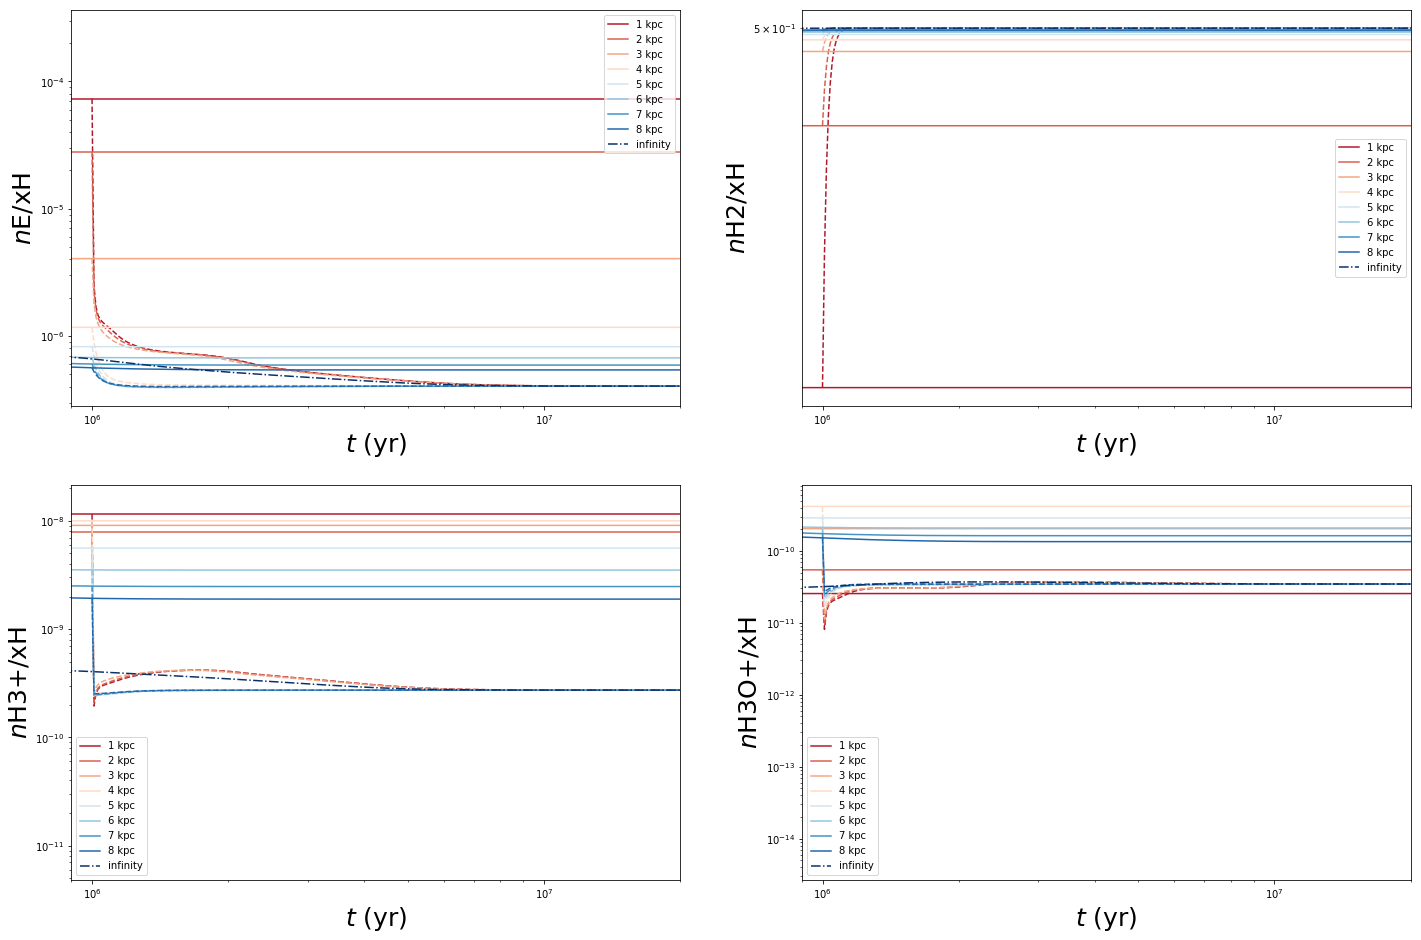

In [3]:
plot_group('E', 'H2', 'H3j', 'H3Oj')

4


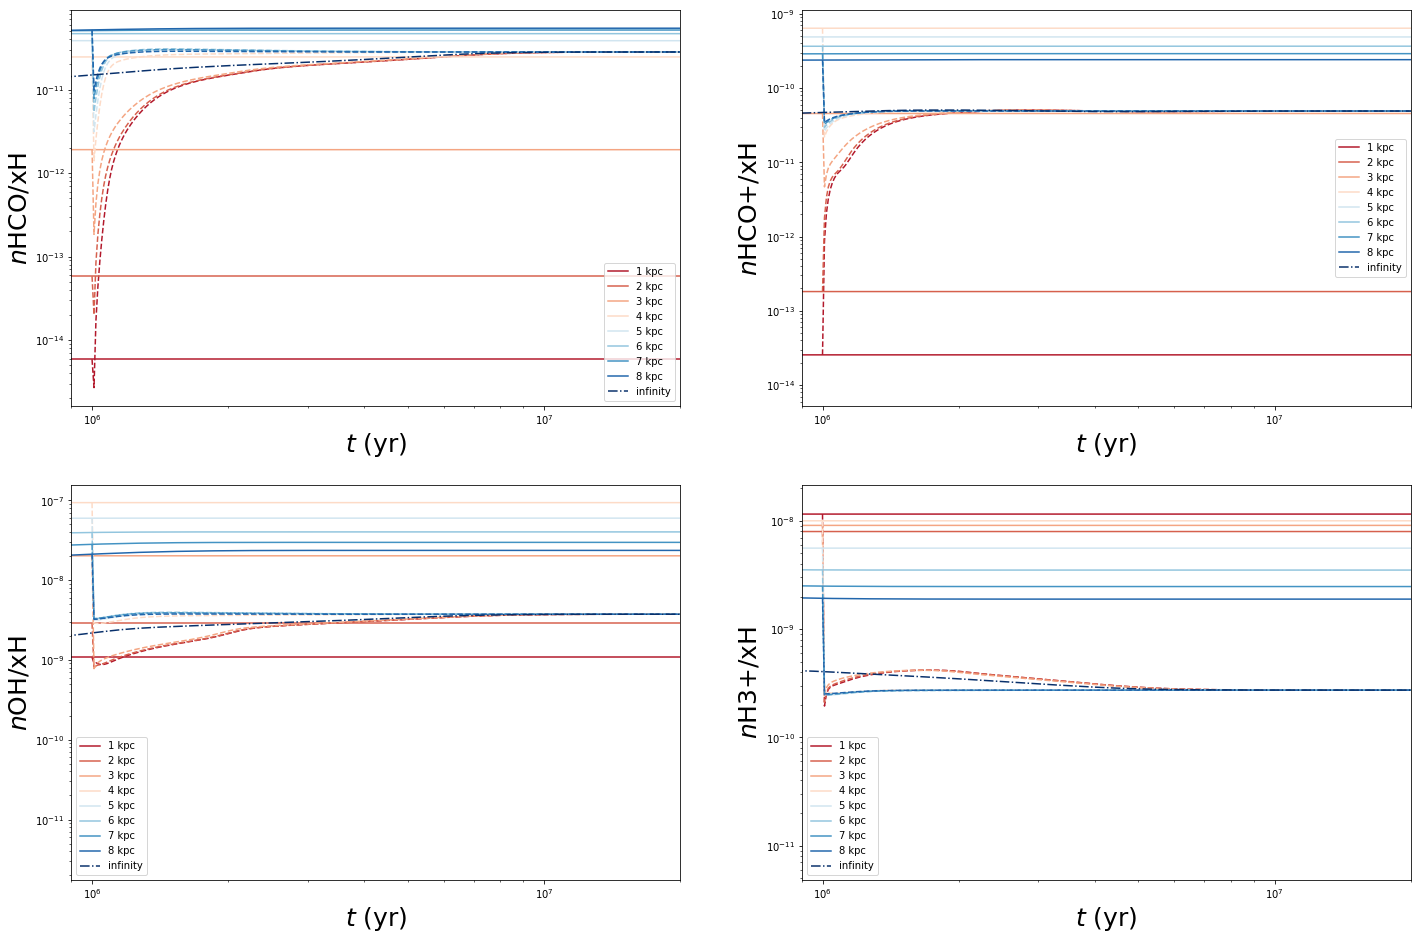

In [4]:
plot_group('HCO', 'HCOj', 'OH', 'H3j')
plt.savefig('Radicals.eps')

6


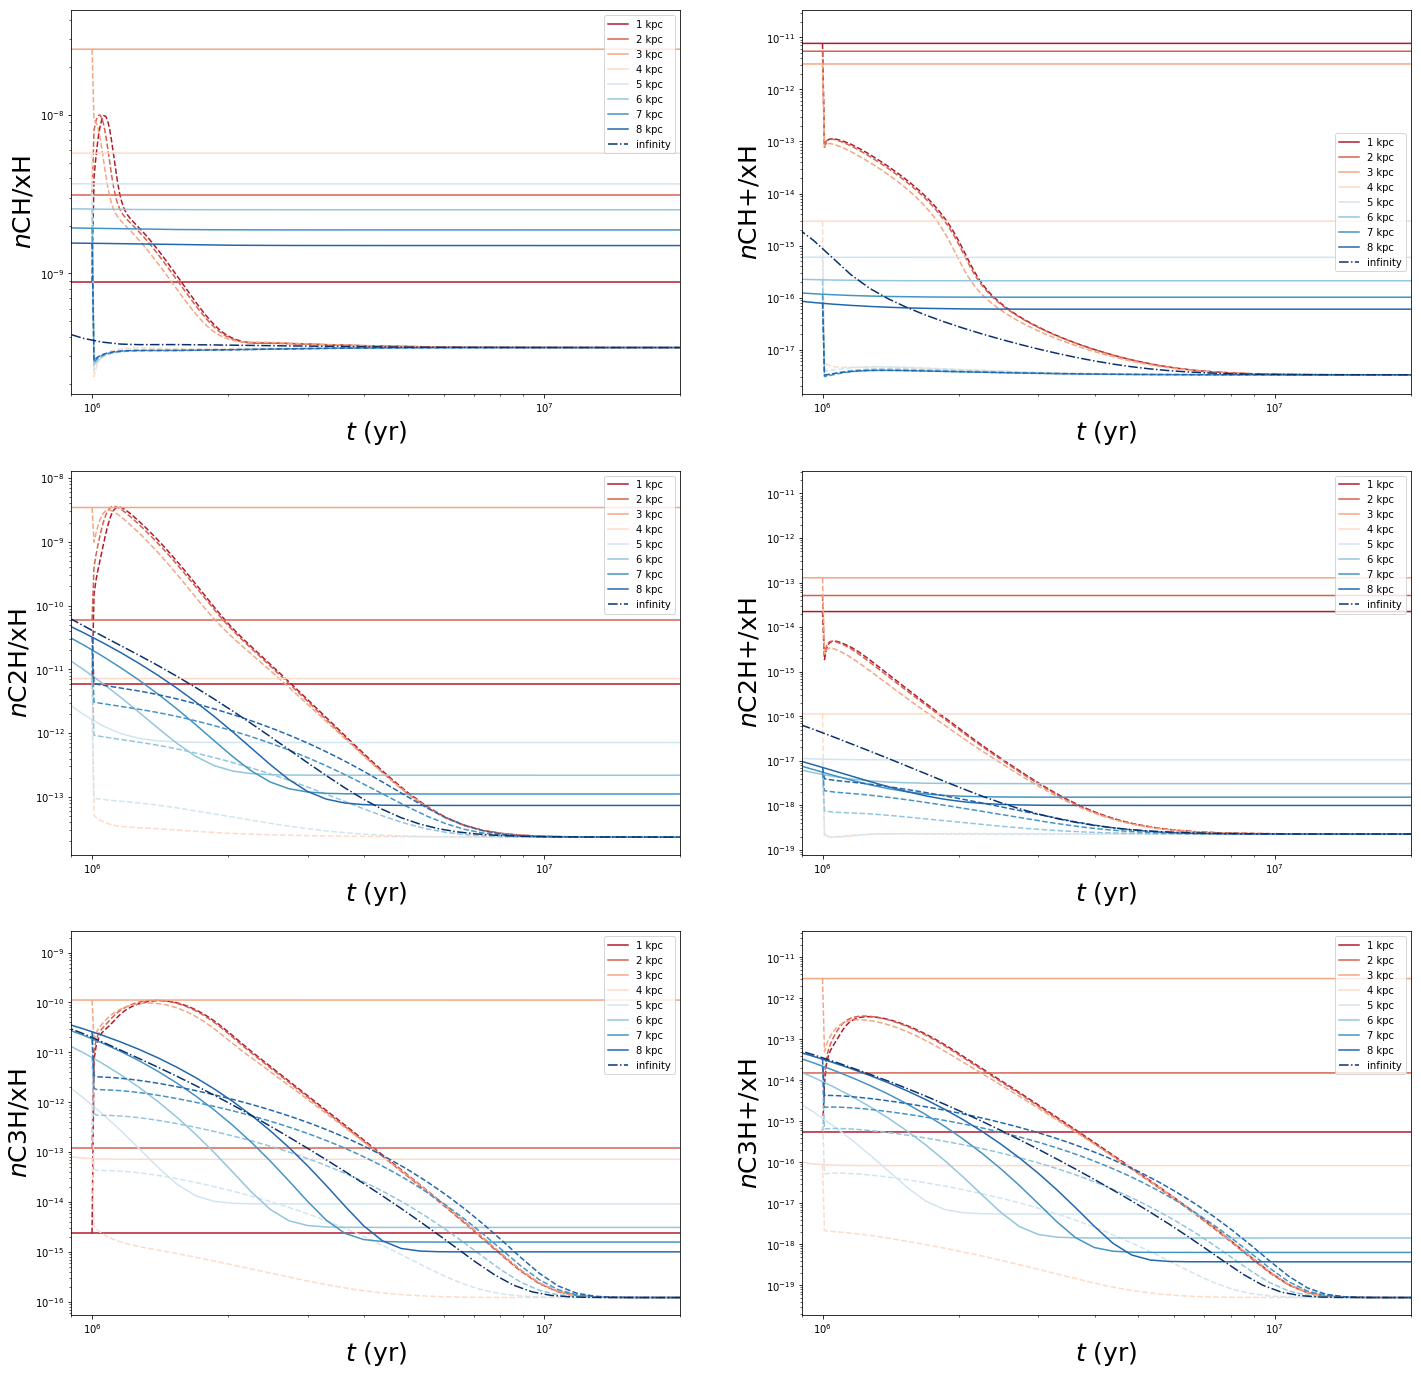

In [5]:
plot_group('CH','CHj','C2H','C2Hj','C3H','C3Hj')
plt.savefig('Carbon_chain.eps')

10


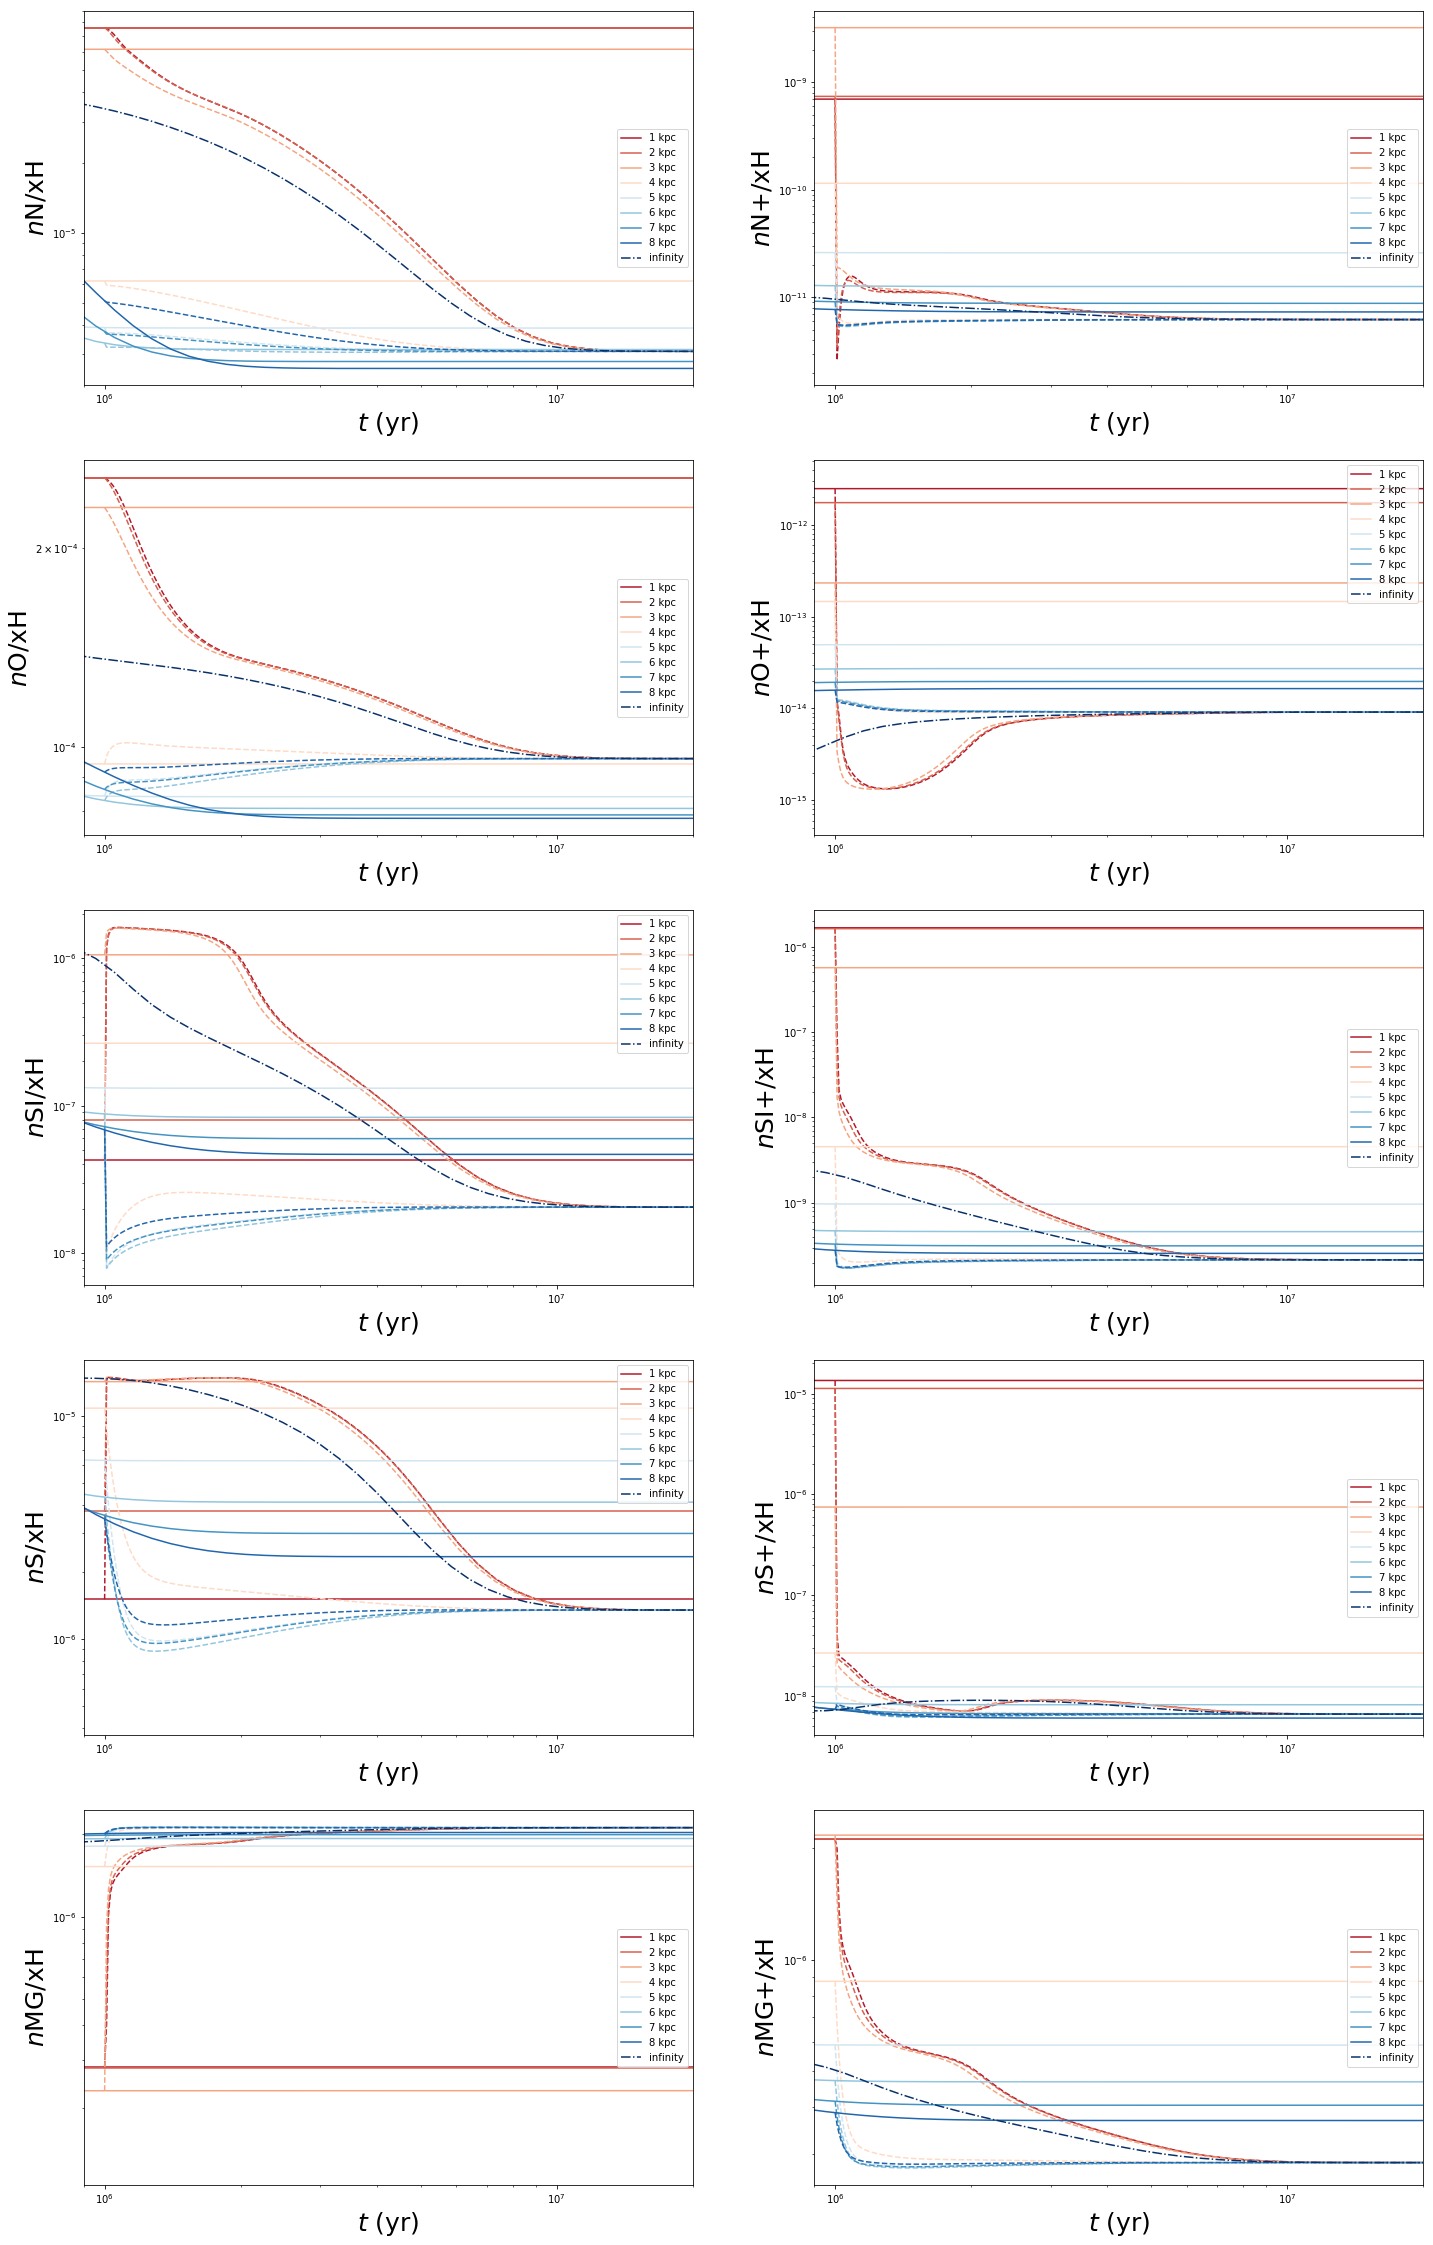

In [6]:
plot_group('N','Nj','O','Oj','SI','SIj','S','Sj','MG','MGj')

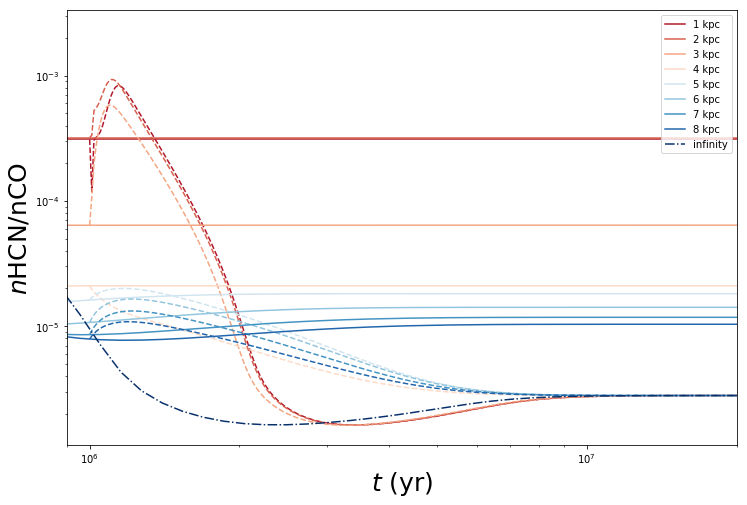

In [7]:
plt.figure(figsize=(12,8))
plot_all('HCN','CO')
plt.savefig('HCN_CO.eps')

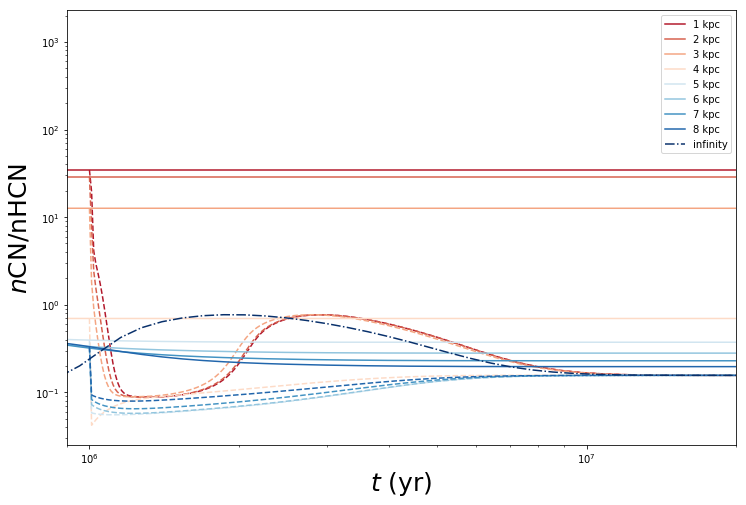

In [8]:
plt.figure(figsize=(12,8))
plot_all('CN','HCN')

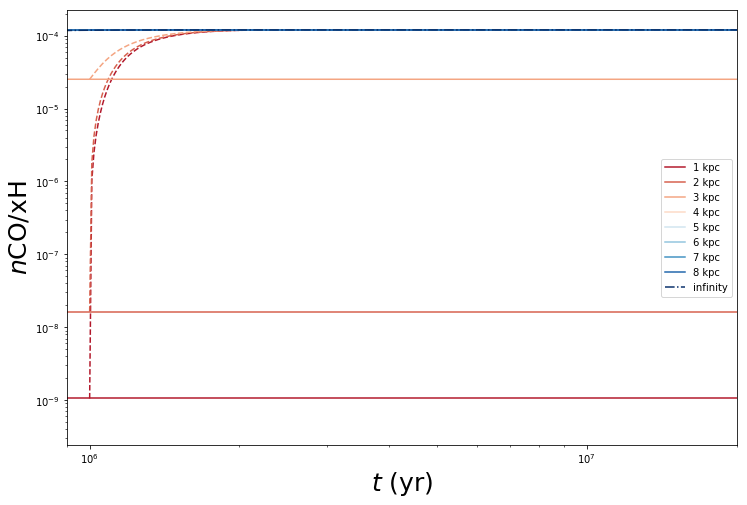

In [9]:
plt.figure(figsize=(12,8))
plot_all('CO')

2


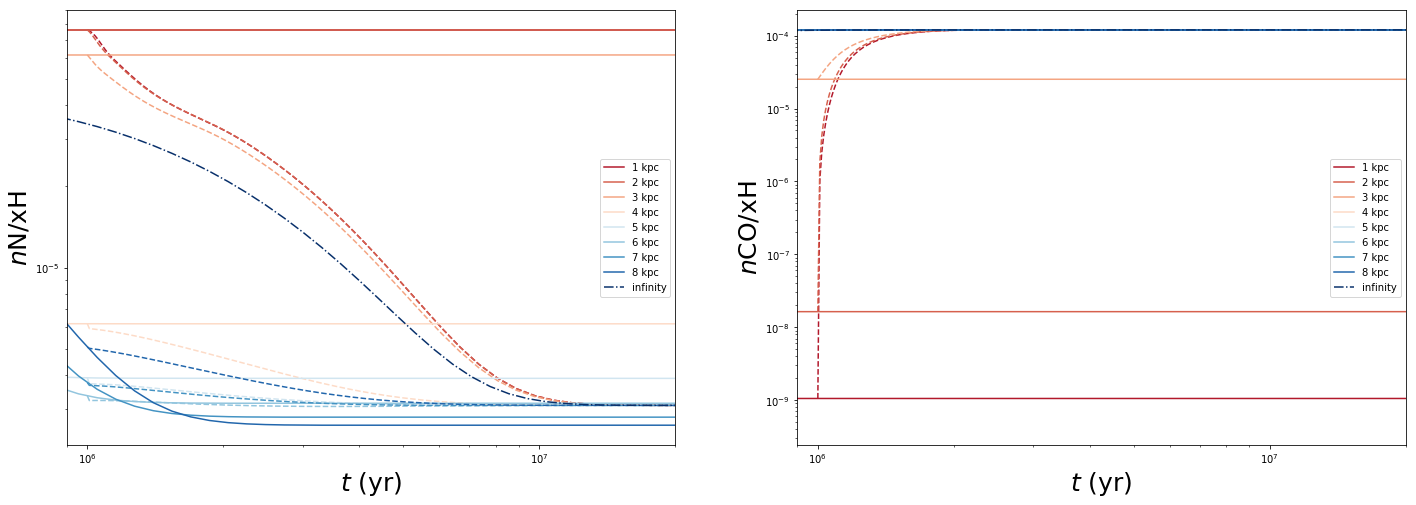

In [10]:
plot_group('N','CO')

In [41]:
def sensi(spe, div=None):
    for j in range(6):
        i = j+1
        txt = './data/X_sensi'+str(i)
        raw = np.loadtxt(txt)
        t = raw[:,0]
        d = 'xH'
        abu = raw[:,eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:,eval('krome_idx_' + div)]
            d = 'n' + div
        plt.loglog(t, abu, color = Col[i-1])
        plt.xlabel(r'$t$ (yr)', fontsize = 25)
        plt.ylabel(r'$n$'+spe.replace('j','+').replace('k','-')+'/'+d, fontsize = 25)
    raw = np.loadtxt('./data/dis_inf')
    t = raw[:,0]
    d = 'xH'
    abu = raw[:,eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:,eval('krome_idx_' + div)]
        d = 'n' + div
    plt.loglog(t, abu, label = 'Cos', color = '#08306b', linestyle = '-')
    raw = np.loadtxt('./data/dis_inf2')
    t = raw[:,0]
    d = 'xH'
    abu = raw[:,eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:,eval('krome_idx_' + div)]
        d = 'n' + div
    plt.loglog(t, abu, label = r'Cos$\times2$', color = '#08306b', linestyle = '--')
    raw = np.loadtxt('./data/dis_inf3')
    t = raw[:,0]
    d = 'xH'
    abu = raw[:,eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:,eval('krome_idx_' + div)]
        d = 'n' + div
    plt.loglog(t, abu, label = r'Cos$\times0.5$', color = '#08306b', linestyle = '-.')
    plt.legend()
    plt.xlim([1e3,2e7])

- Note that the HCN/CO seems so sensitive to X-ray ionization rates that even at a very low ionization rate $\sim 10^{-18}\text{ s}^{-1}$ comparing to cosmic-ray ionization $\sim 10^{-17}\text{ s}^{-1}$. Therefore we gradually lower the ionization rate to see whether it is physical (or just numerical errors).

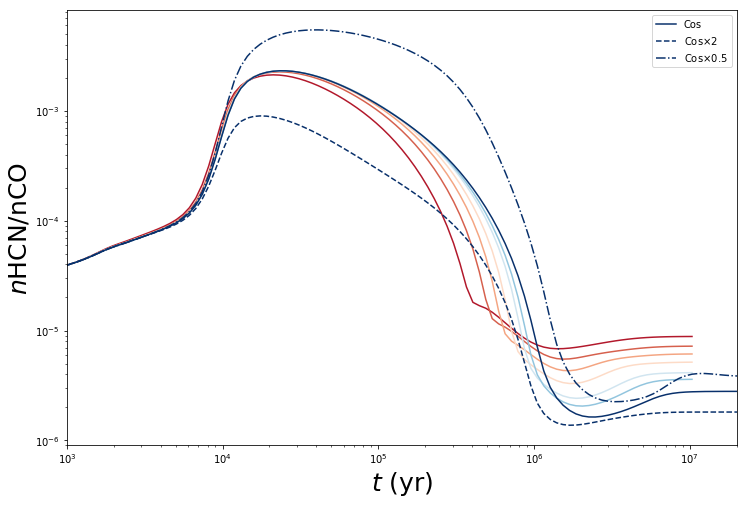

In [42]:
plt.figure(figsize = (12,8))
sensi('HCN','CO')
plt.savefig('X_sensitivity.eps')